# **DS605: Fundamental of Machine Learning Project-3**  

---

# Hardik Bharvada - 202418010   
# Jash Virani - 202418061  
# Kashyap Shingala - 202418052
# Viraj Modi - 202418060 

## **Problem Statement** : Solving Last-Mile Delivery using Clustering Techniques

**Pseudo Code**
**Load Dataset**:  
Read CSV file and inspect columns.
  
**Handle Missing Values**:  
For numeric columns, impute with mean values.
For categorical columns, impute with most frequent values.
  
**Scale Numeric Features**:  
Apply standardization to numeric features.
  
**Perform EDA**:  
Create univariate and multivariate plots.
Analyze geospatial data and correlations.

**Dimensionality Reduction**:  
Apply PCA to retain 95% variance.

**Cluster Analysis**:  
Determine the optimal number of clusters using the Elbow method and BIC.
Apply KMeans, DBSCAN, and Gaussian Mixture models.

**Evaluate Models**:  
Compute silhouette scores for all models.

**Visualize Results**:  
Scatter plots for clustering results.
Silhouette plots for intra-cluster cohesion.







## Data Scraping and Data Pre-Processing

We have scrapped the data from Kaggle [Zomato Delivery Operations Analytics Dataset](https://www.kaggle.com/datasets/saurabhbadole/zomato-delivery-operations-analytics-dataset).

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv("D:\down\Zomato Dataset.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Hardik Bharvada\AppData\Local\Temp\ipykernel_22372\1757537584.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("D:\down\Zomato Dataset.csv")


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [125]:
# Column names
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [127]:
# 5 point summary of numeric attributes
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [128]:
# Checking Null values
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

So there are null values in many attributes like Delivery_person_Age, Delivery_person_Ratings, Time_Orderd and many more.

In [129]:
from sklearn.impute import SimpleImputer

# Handle missing values using mean imputation for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy="mean")

df_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols, index=df.index)

# Identify categorical columns
categorical_cols = df.select_dtypes(exclude=np.number).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
df_imputed_categorical = pd.DataFrame(imputer_categorical.fit_transform(df[categorical_cols]), columns=categorical_cols, index=df.index)

# Combine the imputed numeric and categorical DataFrames
df = pd.concat([df_imputed, df_imputed_categorical], axis=1)

In [130]:
df.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Vehicle_condition              0
multiple_deliveries            0
Time_taken (min)               0
ID                             0
Delivery_person_ID             0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Type_of_order                  0
Type_of_vehicle                0
Festival                       0
City                           0
dtype: int64

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_features_to_scale = df.select_dtypes(include=np.number).columns

# Normalize the df for clustering
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_features_to_scale]), 
                         columns=numeric_features_to_scale, 
                         index=df.index)
df.shape

(45584, 20)

In [132]:
# Checking Duplicates
df.duplicated().sum()

0

In [133]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2.0,3.0,46.0,0xcdcd,DEHRES17DEL01,12-02-2022,21:55,22:10,Fog,Jam,Snack,motorcycle,No,Metropolitian
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,1.0,1.0,23.0,0xd987,KOCRES16DEL01,13-02-2022,14:55,15:05,Stormy,High,Meal,motorcycle,No,Metropolitian
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1.0,1.0,21.0,0x2784,PUNERES13DEL03,04-03-2022,17:30,17:40,Sandstorms,Medium,Drinks,scooter,No,Metropolitian
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,0.0,0.0,20.0,0xc8b6,LUDHRES15DEL02,13-02-2022,09:20,09:30,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1.0,1.0,41.0,0xdb64,KNPRES14DEL02,14-02-2022,19:50,20:05,Fog,Jam,Snack,scooter,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,1.0,0.0,32.0,0x7c09,JAPRES04DEL01,24-03-2022,11:35,11:45,Windy,High,Meal,motorcycle,No,Metropolitian
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,0.0,1.0,36.0,0xd641,AGRRES16DEL01,16-02-2022,19:55,20:10,Windy,Jam,Buffet,motorcycle,No,Metropolitian
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,1.0,0.0,16.0,0x4f8d,CHENRES08DEL03,11-03-2022,23:50,24:05:00,Cloudy,Low,Drinks,scooter,No,Metropolitian
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,0.0,1.0,26.0,0x5eee,COIMBRES11DEL01,07-03-2022,13:35,13:40,Cloudy,High,Snack,motorcycle,No,Metropolitian


# Exploratory Data Analysis(EDA)

## Univariate analysis

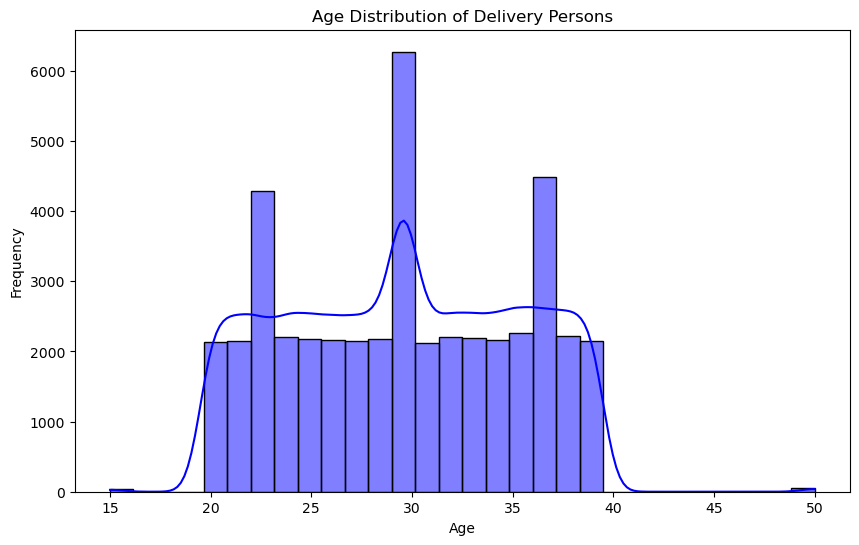

In [134]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_person_Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution of Delivery Persons')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

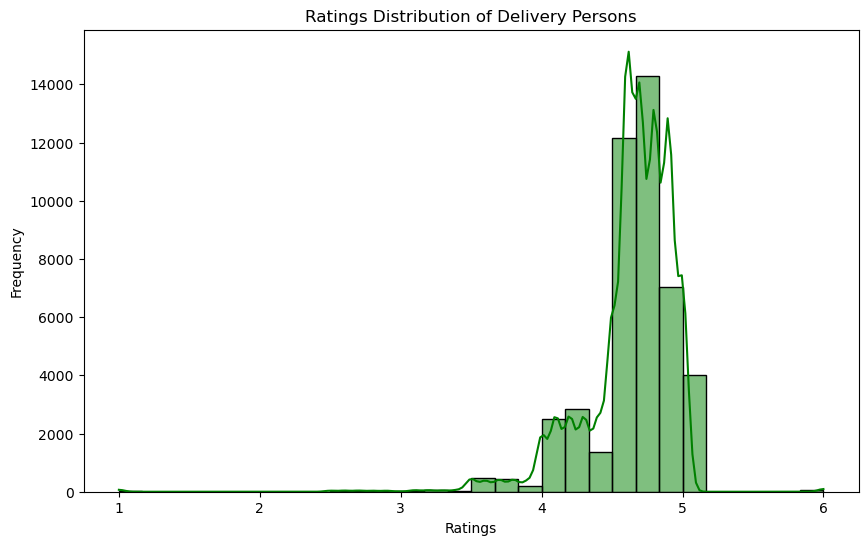

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_person_Ratings'], kde=True, bins=30, color='green')
plt.title('Ratings Distribution of Delivery Persons')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

## Multivariate Analysis

### Hypothesis: As the traffic conditions worsens the average delivery time would increase

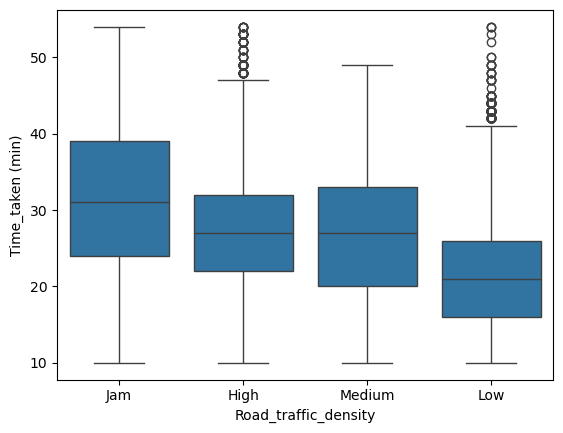

In [136]:
sns.boxplot(x='Road_traffic_density', y='Time_taken (min)', data=df)
plt.show()

Conclusion: It was very obvious to conclude that Jam would have the highest average delivery time of about 32 minutes among all other traffic conditions and the least being in Low traffic of about 20 minutes.

### Hypothesis: Larger cities would have longer delivery time

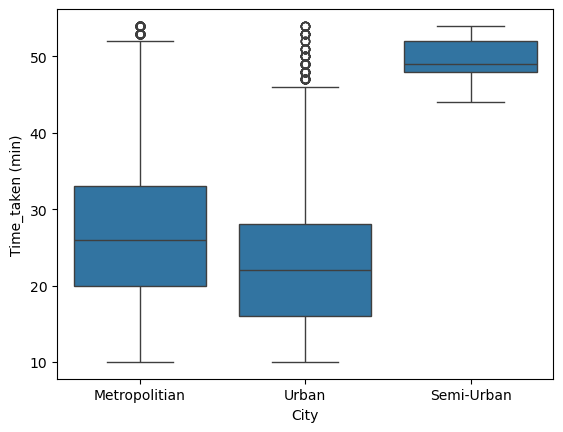

In [137]:
sns.boxplot(x='City', y='Time_taken (min)', data=df)
plt.show()

Conclusion: Similar to our hypothesis Metropolitian cities has higher median delivery time of around 25 mins compared utban cities of around 22 minutes while sub-urbas has higher delivery time that may be because less number of people order food from that area so there may be less numbers of delivery boys.

### Hypothesis: Bad weather conditions would increase the delhivery time

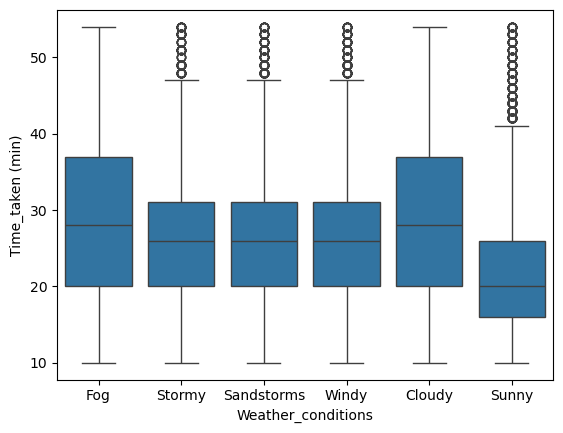

In [138]:
sns.boxplot(x='Weather_conditions', y='Time_taken (min)', data=df)
plt.show()

Conclusion: As expected bad weather conditioins like Sandstorms, Windy, Stormy or Fog has higher median time of delhivery as compared to good weather like Sunny.

### Hypothesis: In festive seasons the delhivery time would be higher

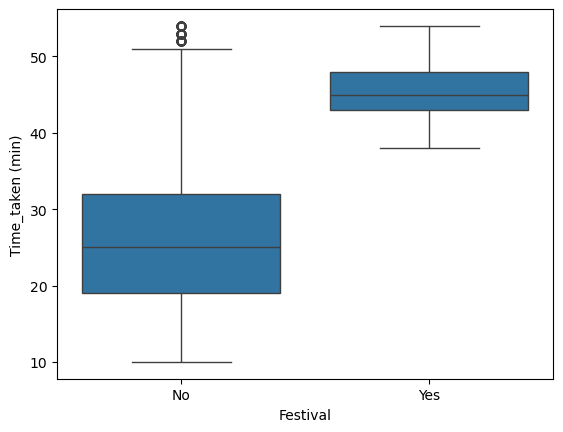

In [139]:
sns.boxplot(x='Festival', y='Time_taken (min)', data=df)
plt.show()

Conclusion: As expected on festival season it usually takes more time to delivery because of higher demand and more traffic so the median delivery time is high around 45 minutes as compared to 25 for no-festive seasons.

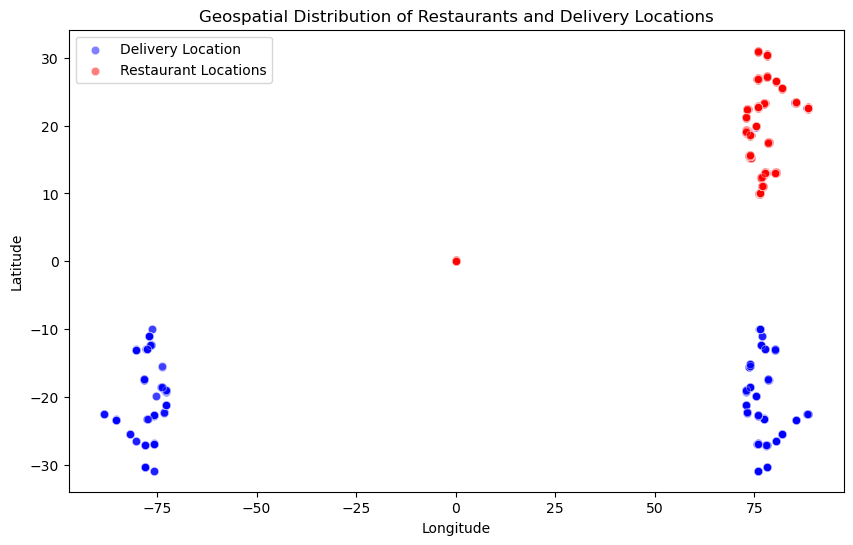

In [153]:
# Geospatial visualization of how restraunts and delivery homes are located
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Restaurant_longitude', y='Restaurant_latitude',
    data=df, label='Delivery Location', color='blue', alpha=0.5
)
sns.scatterplot(
    x='Delivery_location_longitude', y='Delivery_location_latitude',
    data=df, label='Restaurant Locations', color='red', alpha=0.5
)
plt.title('Geospatial Distribution of Restaurants and Delivery Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

### Hypothesis: As the ratings of delhivery person increases the delhivery time would decrease given normal traffic conditions

<Axes: xlabel='Delivery_person_Ratings', ylabel='Time_taken (min)'>

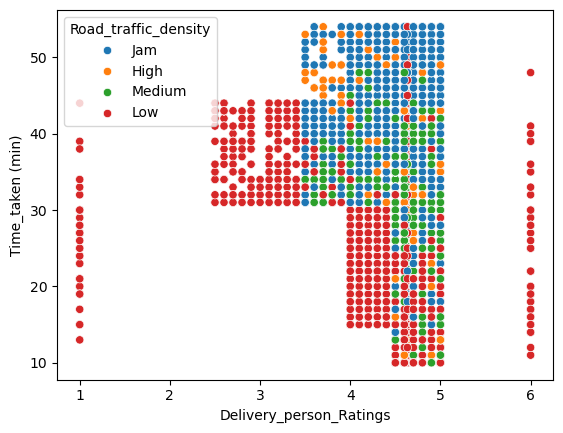

In [141]:
sns.scatterplot(x='Delivery_person_Ratings', y='Time_taken (min)', hue='Road_traffic_density',data = df)

Conclusion: Its can be observed that irrespective of the ratings of delivery person the variability in delivery time remains the same but as observed above area with high traffic takes more delhivery time so most of blue, orange and green dots are on the upper part of the plot

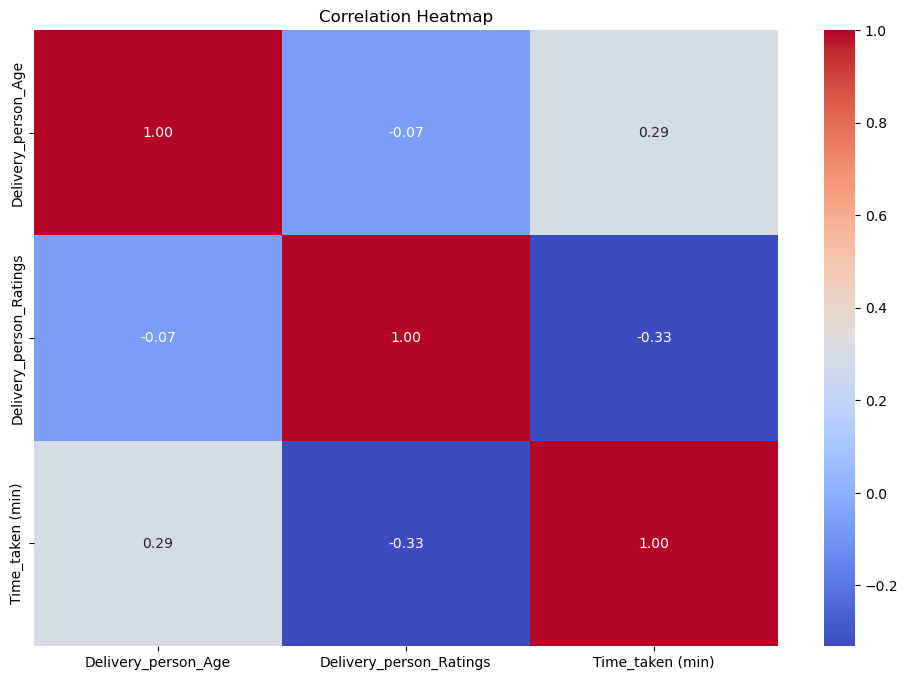

In [143]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken (min)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Model

In [144]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [145]:
# Select relevant columns for clustering
columns_for_clustering = [
    "Delivery_location_latitude",
    "Delivery_location_longitude",
    "Time_taken (min)", "Road_traffic_density"
]
df_subset = df[columns_for_clustering]

In [146]:
label_encoder = LabelEncoder()

df_subset['Road_traffic_density'] = label_encoder.fit_transform(df_subset['Road_traffic_density'])

C:\Users\Hardik Bharvada\AppData\Local\Temp\ipykernel_22372\3868400279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Road_traffic_density'] = label_encoder.fit_transform(df_subset['Road_traffic_density'])


In [147]:
# Step 3: Apply PCA for dimensionality reduction
pca = PCA(0.95)
df_subset = pca.fit_transform(df_subset)

# Number of components retained
print(f"Number of PCA components retained: {df_subset.shape[1]}")

Number of PCA components retained: 2


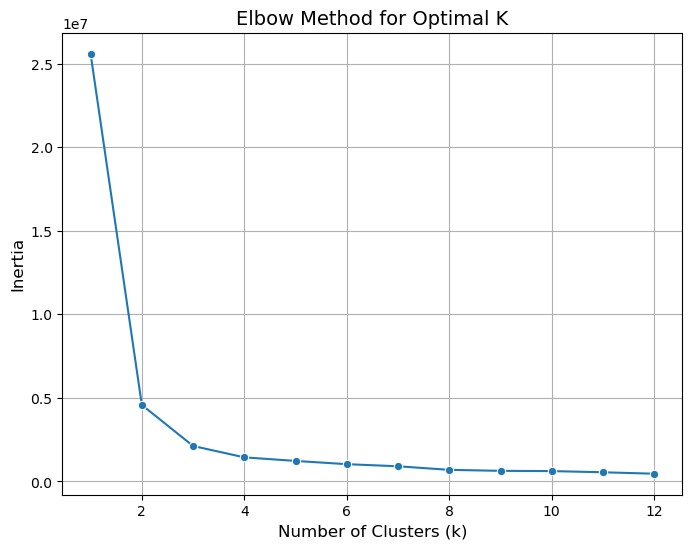

In [148]:
# Determine the optimal number of clusters using the Elbow method in kmeans
inertia = []
k_values = range(1, 13)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_subset)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
sns.lineplot(x=k_values, y=inertia, marker='o')
plt.title("Elbow Method for Optimal K", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.grid(True)
plt.show()


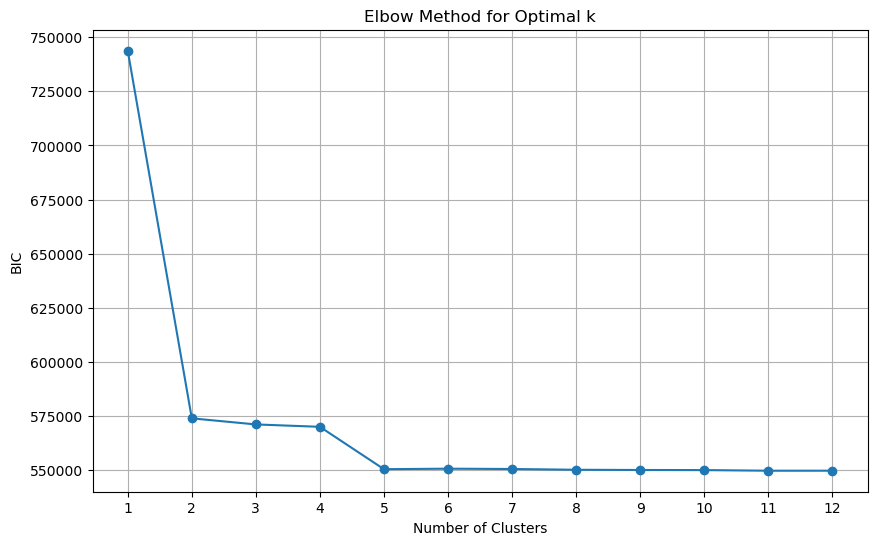

In [149]:
# Determine the optimal value of n_components using the Elbow method
k_values = np.arange(1,13)
BIC = []

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_subset)
    BIC.append(gmm.bic(df_subset))

plt.figure(figsize=(10, 6))
plt.plot(k_values, BIC, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.xticks(k_values)
plt.grid()
plt.show()

In [150]:
# Custom Scorer for Silhouette Score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1: 
        return silhouette_score(X, labels)
    else:
        return -1 

scorer = make_scorer(silhouette_scorer, greater_is_better=True)

In [151]:
# GridSearch for KMeans 
kmeans_params = {'n_clusters': range(2, 10), 'init': ['k-means++'], 'random_state': [42]}
kmeans = GridSearchCV(KMeans(), kmeans_params, scoring=scorer, cv=3)
kmeans.fit(df_subset)
best_kmeans = kmeans.best_estimator_
kmeans_labels = best_kmeans.labels_

# GridSearch for DBSCAN 
dbscan_params = {'eps': np.arange(0.2, 1.2, 0.1), 'min_samples': range(3, 10)}
dbscan = GridSearchCV(DBSCAN(), dbscan_params, scoring=scorer, cv=3)
dbscan.fit(df_subset)
best_dbscan = dbscan.best_estimator_
dbscan_labels = best_dbscan.fit_predict(df_subset)

# GridSearch for Gaussian Mixture 
gmm_params = {'n_components': range(2, 10), 'random_state': [42]}
gmm = GridSearchCV(GaussianMixture(), gmm_params, scoring=scorer, cv=3)
gmm.fit(df_subset)
best_gmm = gmm.best_estimator_
gmm_labels = best_gmm.fit_predict(df_subset)

# Evaluation 
kmeans_silhouette = silhouette_score(df_subset, kmeans_labels)
dbscan_silhouette = silhouette_score(df_subset, dbscan_labels)
gmm_silhouette = silhouette_score(df_subset, gmm_labels)

print(f"KMeans Best Params: {kmeans.best_params_} - Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Best Params: {dbscan.best_params_} - Silhouette Score: {dbscan_silhouette}")
print(f"Gaussian Mixture Best Params: {gmm.best_params_} - Silhouette Score: {gmm_silhouette}")


c:\Users\Hardik Bharvada\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Hardik Bharvada\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\Hardik Bharvada\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Hardik Bharvada\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **sc

KMeans Best Params: {'init': 'k-means++', 'n_clusters': 2, 'random_state': 42} - Silhouette Score: 0.8518115957093594
DBSCAN Best Params: {'eps': 0.2, 'min_samples': 3} - Silhouette Score: 0.7818910353553027
Gaussian Mixture Best Params: {'n_components': 2, 'random_state': 42} - Silhouette Score: 0.8518115957093594


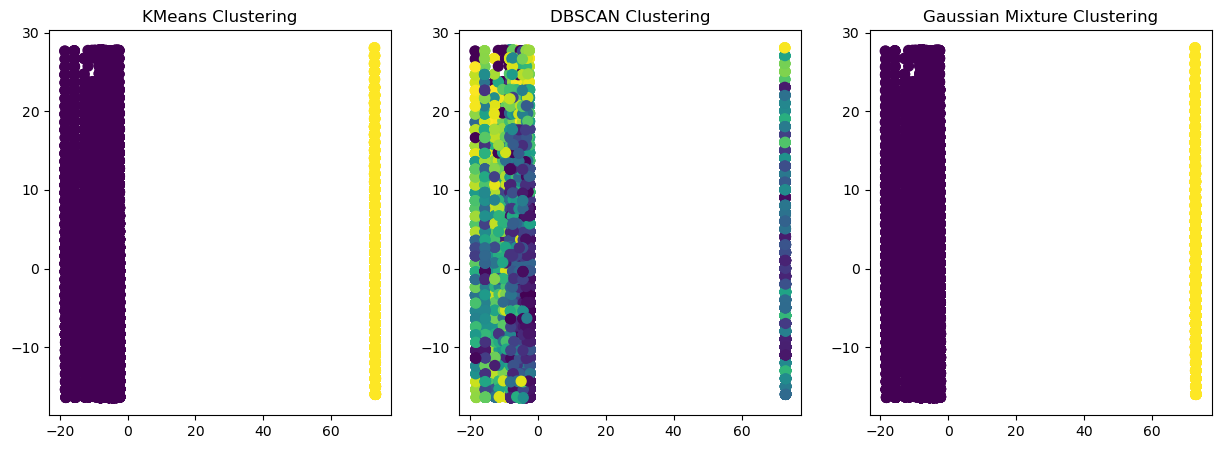

In [152]:
# ----- Visualization -----
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Visualize KMeans results
ax[0].scatter(df_subset[:, 0], df_subset[:, 1], c=kmeans_labels, cmap='viridis', s=50)
ax[0].set_title('KMeans Clustering')

# Visualize DBSCAN results
ax[1].scatter(df_subset[:, 0], df_subset[:, 1], c=dbscan_labels, cmap='viridis', s=50)
ax[1].set_title('DBSCAN Clustering')

# Visualize Gaussian Mixture results
ax[2].scatter(df_subset[:, 0], df_subset[:, 1], c=gmm_labels, cmap='viridis', s=50)
ax[2].set_title('Gaussian Mixture Clustering')

plt.show()

# DOCUMENTATION

**Data Preparation and Processing**
**Loading Data**:  
Read the Zomato dataset into a DataFrame using Pandas and inspect column names.  
   
Handling Missing Values:  
Impute missing numeric values with the mean and categorical values with the most frequent values using SimpleImputer.

**Feature Scaling**:  
Standardize numerical features using StandardScaler to prepare data for clustering.
  
**Exploratory Data Analysis (EDA)**
**Univariate Analysis**:  
Plot histograms for delivery person age and ratings to analyze their distributions.
  
**Multivariate Analysis**:
  
Use box plots to explore relationships between delivery time and traffic density, city, weather, and festivals.
  
Geospatial Visualization:  
Scatter plots show the geographical locations of restaurants and delivery points.
  
Correlation Analysis:  
Generate a heatmap to visualize correlations between numeric features like delivery person age, ratings, time taken, and distance.
  
**Clustering and Dimensionality Reduction**

PCA for Dimensionality Reduction:  
Retain 95% variance to reduce dimensionality.

**Optimal Clusters Determination**:
Use the Elbow method (KMeans) and Bayesian Information Criterion (Gaussian Mixture) to determine the ideal number of clusters.

**Clustering Models**:
Apply KMeans, DBSCAN, and Gaussian Mixture models with hyperparameter tuning using GridSearchCV.

**Silhouette Evaluation**:
Use silhouette scores to evaluate and compare clustering model performance.

**Visualization**
Plot clustering results for each algorithm and create silhouette plots to analyze intra-cluster cohesion and separation.